In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_dataframe = pd.read_csv("./Diabetes dataset/diabetes.csv")
diabetes_dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
corr_matrix = diabetes_dataframe.corr()
corr_matrix
corr_matrix['Outcome']*100

Pregnancies                  22.189815
Glucose                      46.658140
BloodPressure                 6.506836
SkinThickness                 7.475223
Insulin                      13.054795
BMI                          29.269466
DiabetesPedigreeFunction     17.384407
Age                          23.835598
Outcome                     100.000000
Name: Outcome, dtype: float64

<Axes: >

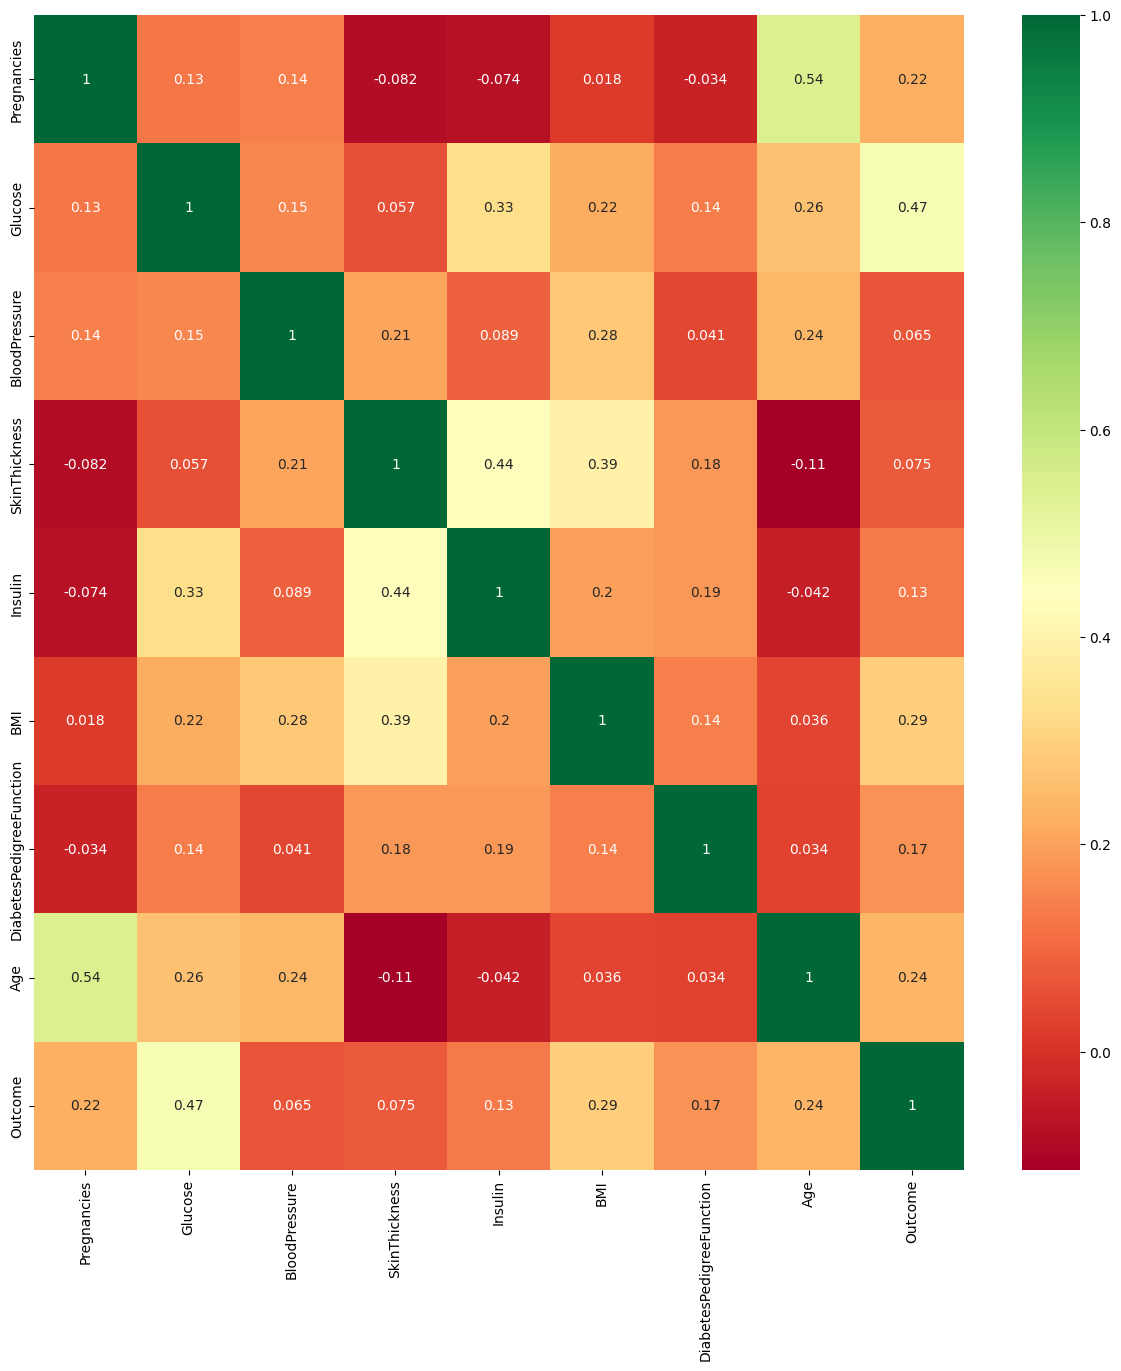

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(diabetes_dataframe.corr(), annot=True, cmap='RdYlGn')

In [10]:
diabetes_dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X = diabetes_dataframe.drop('Outcome', axis='columns')
y = diabetes_dataframe.Outcome
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=51,test_size=0.2)
print(len(X_train)) # 614
print(len(X_test))  # 154

614
154


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [24]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)
print("----------------------")
print(X_test_sc)

[[ 0.6333217  -3.81590043 -0.03757003 ...  0.88353965  0.81889804
   0.63824698]
 [ 0.03691139  0.1059802   0.06294412 ... -0.37999295  2.10510845
   0.97212016]
 [ 1.22973201 -0.30189538  0.16345826 ... -1.04303481  1.16743947
   2.05720799]
 ...
 [-1.15590924  0.13735525  0.86705727 ... -0.56764631  0.16499731
  -1.03111892]
 [-1.15590924  0.41973065 -0.03757003 ...  1.29637703 -0.29766831
  -0.78071404]
 [-1.15590924 -0.67839593  0.96757141 ...  1.8593371   1.54374084
  -0.19643597]]
[[ 1.22973201 -1.7765225   0.16345826 ...  0.00782398  0.42717449
   0.72171527]
 [ 1.82614233 -1.46277205  0.66602898 ...  0.17045689 -0.61228092
   0.38784209]
 [-0.55949893  0.76485615  0.06294412 ... -0.49258497 -0.38403255
  -0.36337256]
 ...
 [ 0.33511654 -0.20777025  1.47014213 ...  2.62246075 -0.77884055
  -0.44684086]
 [ 0.93152686  1.20410678 -0.74116903 ... -0.17982937  0.39016124
   0.47131039]
 [ 1.82614233 -1.68239737  1.8721987  ...  0.44568181 -0.5444233
   1.13905675]]


In [102]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression()
mdl.fit(X_train,y_train)
acc = mdl.score(X_test,y_test)*100 
acc # 77.34375

77.34375

In [103]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

(639, 4)

In [104]:
pca.explained_variance_ratio_

array([0.85416513, 0.10930109, 0.01979041, 0.0112758 ])

In [105]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,random_state=30,test_size=0.2)
len(X_train) # 511
len(X_test)  # 128

128

In [106]:
mdl = LogisticRegression()
mdl.fit(X_train_pca, y_train)
mdl.score(X_test_pca,y_test)*100

75.78125